#Semana 8 Estadística Inferencial 3 Regresión Logística

## Cargue, descripción y análisis exploratorio del dataset

In [ ]:
#Se importan las librerías clásicas:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as pty
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.special import expit

from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,f1_score, classification_report)
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay


# se debe instalar solo una vez
# pip install pandas-profiling

<ipython-input-1-083c1f35261a>:18: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# importamos el dataset
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Ruta="/content/drive/MyDrive/Copia de diabetes.csv"

#Importamos los archivos contenidos en el folder y chequeamos los datasets:
dfDiabetes = pd.read_csv(Ruta)
dfDiabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

>**Análisis exploratorio de datos:**

 


A continuación se hace uso de pandas profiling para generar un informe con la información de cada variable presente en el dataset.  
En este informe podemos visualizar valores nulos, medidas de tendencia, tipos de variables, histogramas por variable y gráfica de correlación

In [ ]:
exploratory_report = ProfileReport(dfDiabetes)
#exploratory_report
# comentamos temporalmente
#exploratory_report.to_file(output_file='ExpAnalysis_BreastCancer')

In [ ]:
exploratory_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]



> Visualizamos la metadata que el dataset nos ofrece para revisar más información brindada para el entendimiento del mismo






In [ ]:
# Revisamos el tipo de variable de cada feature:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Detectamos valores nulos dentro de los features:
dfDiabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Reemplazamos los valores iguales a cero de la siguiente feature con la media general de esta columna
dfDiabetes['SkinThickness'] = dfDiabetes['SkinThickness'].replace(0,dfDiabetes['SkinThickness'].mean())

In [ ]:
dfDiabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      26.606479   79.799479   
std       3.369578   31.972618      19.355807       9.631241  115.244002   
min       0.000000    0.000000       0.000000       7.000000    0.000000   
25%       1.000000   99.000000      62.000000      20.536458    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Text(0.5, 1.0, 'Outcome')

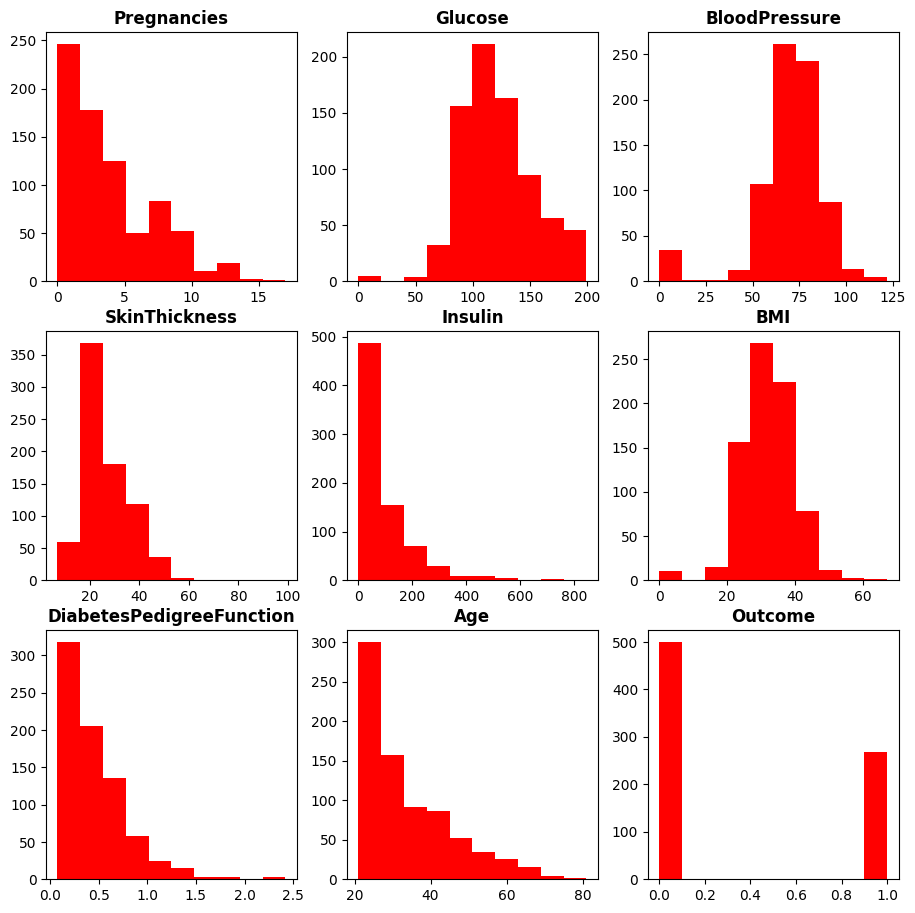

In [ ]:
# Vamos a revisar la distribución en general por columnas para ver las concentraciones a nivel general:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(11,11)
#----------------
axs[0, 0].hist(dfDiabetes['Pregnancies'], bins=10, color = 'red', density=False)
axs[0, 0].set_title('Pregnancies', fontweight ="bold")
#----------------
axs[0, 1].hist(dfDiabetes['Glucose'], bins=10, color = 'red', density=False)
axs[0, 1].set_title('Glucose', fontweight ="bold")
#----------------
axs[0, 2].hist(dfDiabetes['BloodPressure'], bins=10, color = 'red', density=False)
axs[0, 2].set_title('BloodPressure', fontweight ="bold")
#----------------
axs[1, 0].hist(dfDiabetes['SkinThickness'], bins=10, color = 'red', density=False)
axs[1, 0].set_title('SkinThickness', fontweight ="bold")
#----------------
axs[1, 1].hist(dfDiabetes['Insulin'], bins=10, color = 'red', density=False)
axs[1, 1].set_title('Insulin', fontweight ="bold")
#----------------
axs[1, 2].hist(dfDiabetes['BMI'], bins=10, color = 'red', density=False)
axs[1, 2].set_title('BMI', fontweight ="bold")
#----------------
axs[2, 0].hist(dfDiabetes['DiabetesPedigreeFunction'], bins=10, color = 'red', density=False)
axs[2, 0].set_title('DiabetesPedigreeFunction', fontweight ="bold")
#----------------
axs[2, 1].hist(dfDiabetes['Age'], bins=10, color = 'red', density=False)
axs[2, 1].set_title('Age', fontweight ="bold")
#----------------
axs[2, 2].hist(dfDiabetes['Outcome'], bins=10, color = 'red', density=False)
axs[2, 2].set_title('Outcome', fontweight ="bold")

## Normalización y entrenamiento 




In [ ]:
# Creamos un objeto tipo scaler:
scaler = StandardScaler()

In [ ]:
# Generamos la partición de los datos del target y los features:
X = dfDiabetes.drop(['Outcome'], axis = 1)
y = dfDiabetes.Outcome

In [ ]:
# Normalizamos la data:
scaler.fit(X)
X_normalized_data = scaler.transform(X)

In [ ]:
#Visualizamos la data ya normalizada:
X_normalized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
# visualizamos el target:
y = y.values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# **Modelo de regresión logistica**

In [ ]:

# Realizamos el split para el training y testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_data, y, test_size = 0.3, random_state = 42)

In [ ]:
# Instanciamos un objeto de la clase LogisticRegression:
logistic_model = LogisticRegression()

In [ ]:
# Hacemos el entrenamiento del modelo de acuerdo al objeto instanciado:
logistic_model.fit(X_train, y_train)

LogisticRegression()

## Revisión de el rendimiento y métricas para el modelo

In [ ]:
# Revisamos ahora el score del modelo de acuerdo al entrenamiento realizado:
print("Score from the logistic regression model (training): {}%".format(round(logistic_model.score(X_train, y_train), 2) * 100))

Score from the logistic regression model (training): 78.0%


In [ ]:
# Revisamos de manera análoga el score del modelo de acuerdo a la data de testing:
print("Score from the logistic regression model (testing): {}%".format(round(logistic_model.score(X_test, y_test), 2) * 100))

Score from the logistic regression model (testing): 73.0%


In [ ]:
# Traemos el coeficiente asociado a la variable Class y por ende a la ecuación de la regresión logística:
print(logistic_model.coef_)

[[ 0.19342819  1.13024296 -0.20354028  0.03241728 -0.12180055  0.81282255
   0.1351157   0.41925215]]


In [ ]:
# Vemos el resultado de las predicciones:
predictions = logistic_model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
# Número de casos cuya predicción es negativa y positiva respectivamente:
print("Total casos negativos predecidos: {}".format((predictions == 0).sum()))
print("Total casos positivos predecidos: {}".format((predictions == 1).sum()))

Total casos negativos predecidos: 152
Total casos positivos predecidos: 79


In [ ]:
# Generamos la matriz:
conf_matrix = confusion_matrix(y_test, predictions)

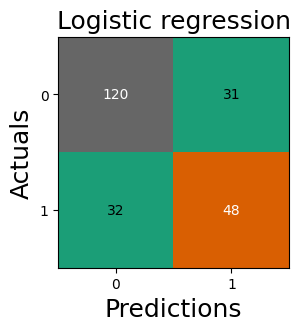

In [ ]:
# Graficamos la matriz de confusión para una mejor visualización:

%matplotlib inline
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_classifier.classes_)
#disp.plot()
#plt.show()
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(3, 3), cmap=plt.cm.Dark2)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic regression', fontsize=18)
plt.show()

In [ ]:
# Revisamos las métricas de rendimiento:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.60      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [ ]:
# Obtener las probabilidades de predicción para los datos de prueba
proba = logistic_model.predict_proba(X_test)
proba

array([[0.72755307, 0.27244693],
       [0.80574608, 0.19425392],
       [0.87957106, 0.12042894],
       [0.85049477, 0.14950523],
       [0.50535031, 0.49464969],
       [0.54724219, 0.45275781],
       [0.98586797, 0.01413203],
       [0.41717952, 0.58282048],
       [0.43522637, 0.56477363],
       [0.21257484, 0.78742516],
       [0.75651556, 0.24348444],
       [0.09416204, 0.90583796],
       [0.60791815, 0.39208185],
       [0.73284845, 0.26715155],
       [0.9305417 , 0.0694583 ],
       [0.63934228, 0.36065772],
       [0.86657753, 0.13342247],
       [0.92805048, 0.07194952],
       [0.14647749, 0.85352251],
       [0.41706676, 0.58293324],
       [0.78717119, 0.21282881],
       [0.92120403, 0.07879597],
       [0.48402387, 0.51597613],
       [0.90374006, 0.09625994],
       [0.4497022 , 0.5502978 ],
       [0.10934438, 0.89065562],
       [0.88330352, 0.11669648],
       [0.96866335, 0.03133665],
       [0.71743007, 0.28256993],
       [0.88971927, 0.11028073],
       [0.

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, proba[:,1], pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, proba[:,1])
print(auc_score1)

0.7995033112582782


<ipython-input-31-6f8494ff211a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


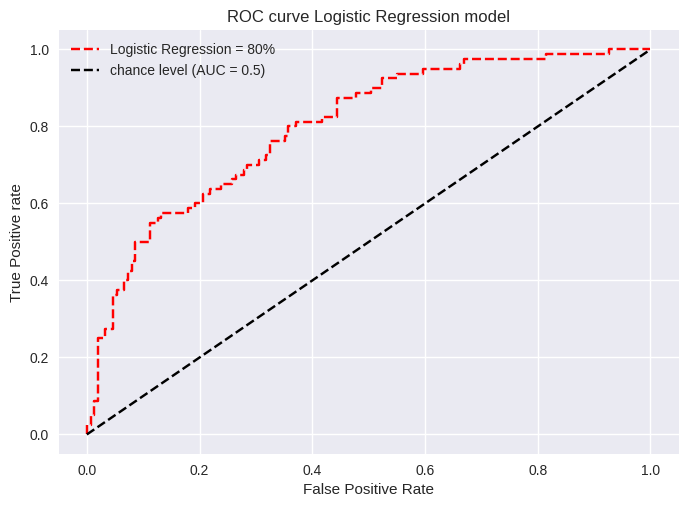

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression = 80%')

# title
plt.title('ROC curve Logistic Regression model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

plt.show()

# **Modelo Naive Bayes**

In [ ]:
# Creamos una instancia u objeto del algoritmo seleccionado y realizamos el training:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Revisamos el score de rendimiento de los data tests:
print("Naive Bayes score: ", round(nb_classifier.score(X_test, y_test), 3))

Naive Bayes score:  0.749


In [ ]:
# Aplicamos el test set de predicciones y vemos el accuracy:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

In [ ]:
# Revisamos las métricas asociadas a la matriz de confusión:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
# Generamos la matriz:
conf_matrix = confusion_matrix(y_test, y_pred)

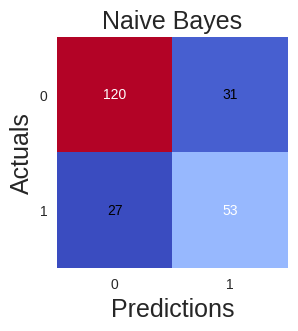

In [ ]:
# Graficamos la matriz de confusión para una mejor visualización:

%matplotlib inline
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_classifier.classes_)
#disp.plot()
#plt.show()
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(3, 3), cmap=plt.get_cmap('coolwarm'))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Naive Bayes', fontsize=18)
plt.show()

In [ ]:
# Obtener las probabilidades de predicción para los datos de prueba
proba = nb_classifier.predict_proba(X_test)
proba

array([[7.02478297e-01, 2.97521703e-01],
       [9.30997765e-01, 6.90022347e-02],
       [9.77803808e-01, 2.21961922e-02],
       [8.57738065e-01, 1.42261935e-01],
       [5.27074016e-01, 4.72925984e-01],
       [4.34505820e-01, 5.65494180e-01],
       [9.96692971e-01, 3.30702930e-03],
       [7.43834589e-01, 2.56165411e-01],
       [5.17124886e-01, 4.82875114e-01],
       [2.94010965e-01, 7.05989035e-01],
       [7.40121598e-01, 2.59878402e-01],
       [2.14964964e-02, 9.78503504e-01],
       [2.70697026e-01, 7.29302974e-01],
       [7.69030356e-01, 2.30969644e-01],
       [9.78645202e-01, 2.13547980e-02],
       [6.26910733e-01, 3.73089267e-01],
       [9.33911655e-01, 6.60883453e-02],
       [9.70688908e-01, 2.93110923e-02],
       [2.80134314e-01, 7.19865686e-01],
       [6.91972721e-01, 3.08027279e-01],
       [8.95808341e-01, 1.04191659e-01],
       [9.60457926e-01, 3.95420742e-02],
       [6.52922898e-02, 9.34707710e-01],
       [9.74771265e-01, 2.52287350e-02],
       [3.402327

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, proba[:,1], pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, proba[:,1])
print(auc_score1)

0.7884105960264901


<ipython-input-41-c22973a5b94e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


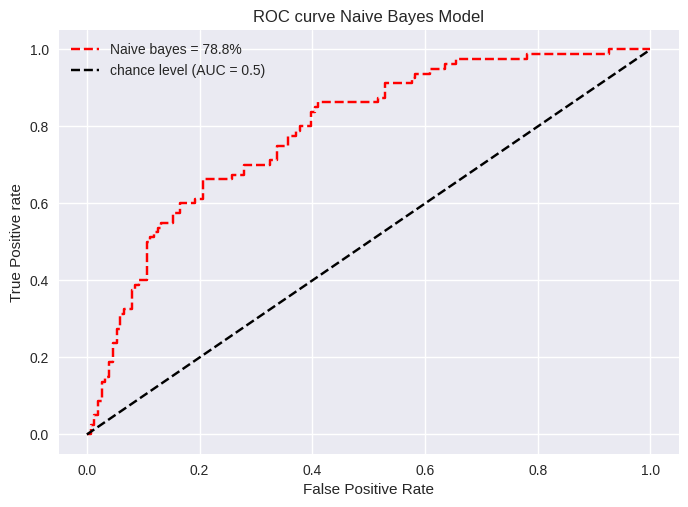

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Naive bayes = 78.8%')

# title
plt.title('ROC curve Naive Bayes Model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

plt.show()


# **Modelo Random forest**

In [ ]:
#Importamos la clase random forest classifier e instanciamos un objeto de la clase
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
#Calculamos el tiempo de ejecución del modelo y hacemos el entrenamiento
%%time
clf.fit(X_train, y_train)

CPU times: user 211 ms, sys: 1.93 ms, total: 213 ms
Wall time: 216 ms


RandomForestClassifier()

In [ ]:
#Predicting the test set result  
y_pred= clf.predict(X_test)

In [ ]:
#Creating the Confusion matrix    
cm= confusion_matrix(y_test, y_pred)

In [ ]:
# Revisamos las métricas asociadas a la matriz de confusión:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



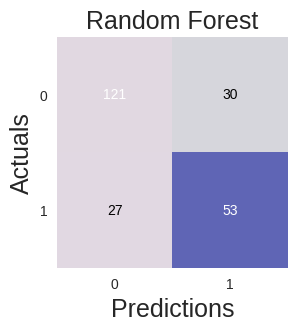

In [ ]:
# Graficamos la matriz de confusión para una mejor visualización:

%matplotlib inline
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_classifier.classes_)
#disp.plot()
#plt.show()
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.get_cmap('twilight'))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Random Forest', fontsize=18)
plt.show()

In [ ]:
# Obtener las probabilidades de predicción para los datos de prueba
proba = clf.predict_proba(X_test)
proba

array([[0.5 , 0.5 ],
       [0.81, 0.19],
       [0.93, 0.07],
       [0.82, 0.18],
       [0.52, 0.48],
       [0.47, 0.53],
       [1.  , 0.  ],
       [0.39, 0.61],
       [0.29, 0.71],
       [0.41, 0.59],
       [0.71, 0.29],
       [0.22, 0.78],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.98, 0.02],
       [0.62, 0.38],
       [0.89, 0.11],
       [0.97, 0.03],
       [0.34, 0.66],
       [0.44, 0.56],
       [0.6 , 0.4 ],
       [0.9 , 0.1 ],
       [0.7 , 0.3 ],
       [0.98, 0.02],
       [0.38, 0.62],
       [0.13, 0.87],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.85, 0.15],
       [0.87, 0.13],
       [0.23, 0.77],
       [0.29, 0.71],
       [0.31, 0.69],
       [0.21, 0.79],
       [0.49, 0.51],
       [0.26, 0.74],
       [0.16, 0.84],
       [0.5 , 0.5 ],
       [0.88, 0.12],
       [0.29, 0.71],
       [0.95, 0.05],
       [0.58, 0.42],
       [0.44, 0.56],
       [0.52, 0.48],
       [0.95, 0.05],
       [0.32, 0.68],
       [0.46, 0.54],
       [0.83,

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, proba[:,1], pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, proba[:,1])
print(auc_score1)

0.8079884105960266


<ipython-input-51-a3f711198dd9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


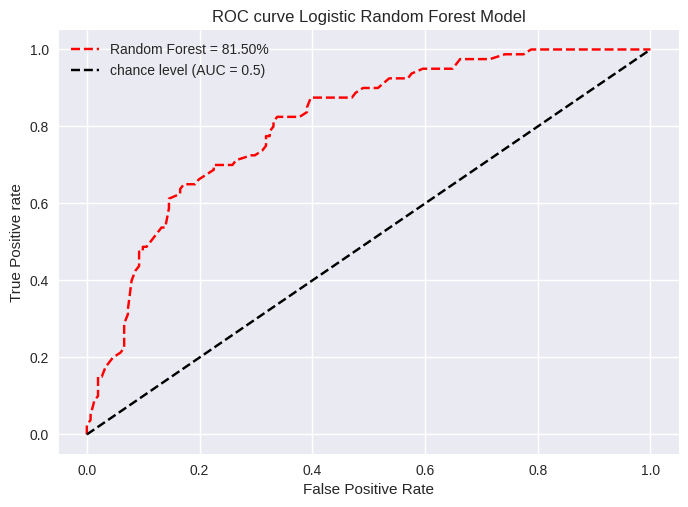

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Random Forest = 81.50%')

# title
plt.title('ROC curve Logistic Random Forest Model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

plt.show()